<a href="https://colab.research.google.com/github/RahmanMonty/Data606Capstone/blob/main/Baltimore_Crime_ML_Attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime as dt
import seaborn as sns
import random
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import preprocessing

In [ ]:
#use for offline

import pandas as pd
df = pd.read_excel('/content/Part1_Crime_data.xlsx')


In [ ]:
df["Hour"] = pd. DatetimeIndex(df['CrimeDateTime']).hour
df.head()

NameError: ignored

In [ ]:
# For our model let's drop redundant crime descriptions
# For example Roberry - street, robbery -  commercial,
# robbery - residence, robbery - carjacking can all be burglary

df['Description'].value_counts()

LARCENY                 75447
COMMON ASSAULT          58026
BURGLARY                47268
LARCENY FROM AUTO       43748
AGG. ASSAULT            39021
AUTO THEFT              29907
ROBBERY - STREET        23219
ROBBERY - COMMERCIAL     5974
SHOOTING                 4515
ROBBERY - RESIDENCE      3623
ROBBERY - CARJACKING     3185
RAPE                     2385
HOMICIDE                 2164
ARSON                    1428
Name: Description, dtype: int64

In [ ]:
df_model = df.drop(["X", "Y", "RowID", "Total_Incidents", 
                    "Shape", "CrimeDateTime", "GeoLocation",
                    "VRIName", "Location", "Shape", "Post"], axis = 1)
df_model.head()

,CrimeCode,Description,Inside_Outside,Weapon,District,Neighborhood,Latitude,Longitude,Premise,Hour
0,6E,LARCENY,NaN,NaN,NORTHEAST,BELAIR-EDISON,39.3245,-76.5781,NaN,14
1,9S,SHOOTING,Outside,FIREARM,CENTRAL,DRUID HEIGHTS,39.3103,-76.6358,STREET,5
2,9S,SHOOTING,Outside,FIREARM,SOUTHERN,WESTPORT,39.2625,-76.6411,STREET,1
3,9S,SHOOTING,Outside,FIREARM,SOUTHERN,WESTPORT,39.2625,-76.6411,STREET,1
4,6E,LARCENY,I,NaN,SOUTHERN,INNER HARBOR,39.2764,-76.6046,PARKING LOT-INSIDE,14


In [ ]:
df_model = df_model[df_model["CrimeCode"].notna()]

df_model = df_model[df_model["Description"].notna()]
df_model = df_model[df_model["Inside_Outside"].notna()]
df_model = df_model[df_model["Weapon"].notna()]
# df_model = df_model[df_model["Post"].notna()]
df_model = df_model[df_model["District"].notna()]
df_model = df_model[df_model["Neighborhood"].notna()]
df_model = df_model[df_model["Latitude"].notna()]
df_model = df_model[df_model["Longitude"].notna()]
df_model = df_model[df_model["Premise"].notna()]


df_model.head()

,CrimeCode,Description,Inside_Outside,Weapon,District,Neighborhood,Latitude,Longitude,Premise,Hour
1,9S,SHOOTING,Outside,FIREARM,CENTRAL,DRUID HEIGHTS,39.3103,-76.6358,STREET,5
2,9S,SHOOTING,Outside,FIREARM,SOUTHERN,WESTPORT,39.2625,-76.6411,STREET,1
3,9S,SHOOTING,Outside,FIREARM,SOUTHERN,WESTPORT,39.2625,-76.6411,STREET,1
8,9S,SHOOTING,Outside,FIREARM,EASTERN,DUNBAR-BROADWAY,39.2953,-76.5913,STREET,22
9,1A,HOMICIDE,Outside,FIREARM,SOUTHERN,CARROLLTON RIDGE,39.2848,-76.6451,STREET,1


In [ ]:
df_model["Post"].astype(object).astype(str)
df_model.head()

,CrimeCode,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,Premise,Hour
1,9S,SHOOTING,Outside,FIREARM,133,CENTRAL,DRUID HEIGHTS,39.3103,-76.6358,STREET,5
2,9S,SHOOTING,Outside,FIREARM,921,SOUTHERN,WESTPORT,39.2625,-76.6411,STREET,1
3,9S,SHOOTING,Outside,FIREARM,921,SOUTHERN,WESTPORT,39.2625,-76.6411,STREET,1
8,9S,SHOOTING,Outside,FIREARM,321,EASTERN,DUNBAR-BROADWAY,39.2953,-76.5913,STREET,22
9,1A,HOMICIDE,Outside,FIREARM,934,SOUTHERN,CARROLLTON RIDGE,39.2848,-76.6451,STREET,1


In [ ]:
#Changing non numeric values into label encoded numeric values

label_encoder = preprocessing.LabelEncoder()

df_model["CrimeCode"] = label_encoder.fit_transform(df_model["CrimeCode"])
# df_model["Post"] = label_encoder.fit_transform(df_model["Post"])
df_model["Description"] = label_encoder.fit_transform(df_model["Description"])
df_model["Inside_Outside"] = label_encoder.fit_transform(df_model["Inside_Outside"])
df_model["Weapon"] = label_encoder.fit_transform(df_model["Weapon"])
df_model["District"] = label_encoder.fit_transform(df_model["District"])
df_model["Neighborhood"] = label_encoder.fit_transform(df_model["Neighborhood"])
df_model["Premise"] = label_encoder.fit_transform(df_model["Premise"])
df_model.head(5)

,CrimeCode,Description,Inside_Outside,Weapon,District,Neighborhood,Latitude,Longitude,Premise,Hour
1,49,8,3,1,0,63,39.3103,-76.6358,104,5
2,49,8,3,1,6,261,39.2625,-76.6411,104,1
3,49,8,3,1,6,261,39.2625,-76.6411,104,1
8,49,8,3,1,1,65,39.2953,-76.5913,104,22
9,0,2,3,1,6,36,39.2848,-76.6451,104,1


In [ ]:
labels = np.array(df_model['CrimeCode'])
features = df_model.drop('CrimeCode', axis = 1)
feature_list = list(features.columns)
features = np.array(features)
print(labels)
print(feature_list)

[49 49 49 ...  9 31  5]
['Description', 'Inside_Outside', 'Weapon', 'District', 'Neighborhood', 'Latitude', 'Longitude', 'Premise', 'Hour']


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

In [ ]:
# i = df_model[((df_model.CrimeCode == 'SD5'))].index
# df_model.drop(i)

In [ ]:
df_model.head()

,CrimeCode,Description,Inside_Outside,Weapon,District,Neighborhood,Latitude,Longitude,Premise,Hour
1,49,8,3,1,0,63,39.3103,-76.6358,104,5
2,49,8,3,1,6,261,39.2625,-76.6411,104,1
3,49,8,3,1,6,261,39.2625,-76.6411,104,1
8,49,8,3,1,1,65,39.2953,-76.5913,104,22
9,0,2,3,1,6,36,39.2848,-76.6451,104,1


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 20, max_depth = 4)
rf.fit(train_features, train_labels);

In [ ]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 1.16 degrees.


In [ ]:

mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -inf %.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [ ]:
from sklearn.tree import export_graphviz
import pydot
tree = rf.estimators_[3]
export_graphviz(tree, out_file='crime_tree.dot', feature_names = feature_list, rounded=True, precision=1)
(graph, ) = pydot.graph_from_dot_file('crime_tree.dot')

graph.write_png('crime_tree.png')
predictions_df = pd.DataFrame(predictions)

test_labels_df = pd.DataFrame(test_labels)
test_labels_df

line_up_df = pd.merge(predictions_df, test_labels_df, left_index=True, right_index=True)
line_up_df

line_up_df.to_csv('random_forest_predictions_to_actuals.csv')

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -inf %.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


ARIMA model

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime as dt
import seaborn as sns
import random
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import preprocessing

In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.5 MB 3.8 MB/s 
     |████████████████████████████████| 9.5 MB 31.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime']).dt.date
# df.head()

In [ ]:
df = pd.read_excel('/content/Part1_Crime_data.xlsx')

In [ ]:
df.head()

,X,Y,RowID,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,Shape
0,1.431688e+06,604046.096242,1,2021/07/03 14:32:00+00,6E,3300 RICHMOND AVE,LARCENY,NaN,NaN,432,NORTHEAST,BELAIR-EDISON,39.3245,-76.5781,"(39.3245,-76.5781)",NaN,NaN,1,NaN
1,1.415386e+06,598803.710854,2,2021/07/03 05:21:54+00,9S,1100 W NORTH AVE,SHOOTING,Outside,FIREARM,133,CENTRAL,DRUID HEIGHTS,39.3103,-76.6358,"(39.3103,-76.6358)",STREET,NaN,1,NaN
2,1.413955e+06,581387.604790,3,2021/07/03 01:37:14+00,9S,2400 ANNOR CT,SHOOTING,Outside,FIREARM,921,SOUTHERN,WESTPORT,39.2625,-76.6411,"(39.2625,-76.6411)",STREET,NaN,1,NaN
3,1.413955e+06,581387.604790,4,2021/07/03 01:37:14+00,9S,2400 ANNOR CT,SHOOTING,Outside,FIREARM,921,SOUTHERN,WESTPORT,39.2625,-76.6411,"(39.2625,-76.6411)",STREET,NaN,1,NaN
4,1.424268e+06,586493.057063,5,2021/07/03 14:00:00+00,6E,500 HARBORVIEW DR,LARCENY,I,NaN,943,SOUTHERN,INNER HARBOR,39.2764,-76.6046,"(39.2764,-76.6046)",PARKING LOT-INSIDE,NaN,1,NaN


In [ ]:
df = df.drop(["RowID", "Total_Incidents", 
                    "Shape", "GeoLocation",
                    "VRIName", "Location", "Shape", "Post"], axis = 1)

df.head()

,X,Y,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,District,Neighborhood,Latitude,Longitude,Premise
0,1.431688e+06,604046.096242,2021/07/03 14:32:00+00,6E,LARCENY,NaN,NaN,NORTHEAST,BELAIR-EDISON,39.3245,-76.5781,NaN
1,1.415386e+06,598803.710854,2021/07/03 05:21:54+00,9S,SHOOTING,Outside,FIREARM,CENTRAL,DRUID HEIGHTS,39.3103,-76.6358,STREET
2,1.413955e+06,581387.604790,2021/07/03 01:37:14+00,9S,SHOOTING,Outside,FIREARM,SOUTHERN,WESTPORT,39.2625,-76.6411,STREET
3,1.413955e+06,581387.604790,2021/07/03 01:37:14+00,9S,SHOOTING,Outside,FIREARM,SOUTHERN,WESTPORT,39.2625,-76.6411,STREET
4,1.424268e+06,586493.057063,2021/07/03 14:00:00+00,6E,LARCENY,I,NaN,SOUTHERN,INNER HARBOR,39.2764,-76.6046,PARKING LOT-INSIDE


In [ ]:
df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime']).dt.date
df['Year'] = pd. DatetimeIndex(df['CrimeDateTime']).year

In [ ]:
df.head()

,X,Y,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,District,Neighborhood,Latitude,Longitude,Premise,Year
0,1.431688e+06,604046.096242,2021-07-03,6E,LARCENY,NaN,NaN,NORTHEAST,BELAIR-EDISON,39.3245,-76.5781,NaN,2021
1,1.415386e+06,598803.710854,2021-07-03,9S,SHOOTING,Outside,FIREARM,CENTRAL,DRUID HEIGHTS,39.3103,-76.6358,STREET,2021
2,1.413955e+06,581387.604790,2021-07-03,9S,SHOOTING,Outside,FIREARM,SOUTHERN,WESTPORT,39.2625,-76.6411,STREET,2021
3,1.413955e+06,581387.604790,2021-07-03,9S,SHOOTING,Outside,FIREARM,SOUTHERN,WESTPORT,39.2625,-76.6411,STREET,2021
4,1.424268e+06,586493.057063,2021-07-03,6E,LARCENY,I,NaN,SOUTHERN,INNER HARBOR,39.2764,-76.6046,PARKING LOT-INSIDE,2021


In [ ]:
# STOPPED HERE... TURN "CrimeDateTime" to a y m d, select years greater than 2014, then set as index
# df_i = df.set_index('name')
# print(df_i)
# df['CrimeDateTime'] = df['CrimeDateTime'].dt.date

In [ ]:
df = df[df["Year"] > 2014]
df.dtypes


X                 float64
Y                 float64
CrimeDateTime      object
CrimeCode          object
Description        object
Inside_Outside     object
Weapon             object
District           object
Neighborhood       object
Latitude          float64
Longitude         float64
Premise            object
Year                int64
dtype: object

In [ ]:

df = df[df["CrimeCode"].notna()]
df = df[df["Description"].notna()]
df = df[df["Inside_Outside"].notna()]
df = df[df["Weapon"].notna()]
df = df[df["District"].notna()]
df = df[df["Neighborhood"].notna()]
df = df[df["Latitude"].notna()]
df = df[df["Longitude"].notna()]
df = df[df["Premise"].notna()]
df = df[df["Premise"].notna()]

df.head()

,X,Y,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,District,Neighborhood,Latitude,Longitude,Premise,Year
1,1.415386e+06,598803.710854,2021-07-03,9S,SHOOTING,Outside,FIREARM,CENTRAL,DRUID HEIGHTS,39.3103,-76.6358,STREET,2021
2,1.413955e+06,581387.604790,2021-07-03,9S,SHOOTING,Outside,FIREARM,SOUTHERN,WESTPORT,39.2625,-76.6411,STREET,2021
3,1.413955e+06,581387.604790,2021-07-03,9S,SHOOTING,Outside,FIREARM,SOUTHERN,WESTPORT,39.2625,-76.6411,STREET,2021
8,1.428002e+06,593393.558177,2021-07-02,9S,SHOOTING,Outside,FIREARM,EASTERN,DUNBAR-BROADWAY,39.2953,-76.5913,STREET,2021
9,1.412791e+06,589505.463782,2021-07-02,1A,HOMICIDE,Outside,FIREARM,SOUTHERN,CARROLLTON RIDGE,39.2848,-76.6451,STREET,2021


In [ ]:
label_encoder = preprocessing.LabelEncoder()
df["Description"] = label_encoder.fit_transform(df["Description"])
df["CrimeCode"] = label_encoder.fit_transform(df["CrimeCode"])
df.head()

,X,Y,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,District,Neighborhood,Latitude,Longitude,Premise,Year
1,1.415386e+06,598803.710854,2021-07-03,49,8,Outside,FIREARM,CENTRAL,DRUID HEIGHTS,39.3103,-76.6358,STREET,2021
2,1.413955e+06,581387.604790,2021-07-03,49,8,Outside,FIREARM,SOUTHERN,WESTPORT,39.2625,-76.6411,STREET,2021
3,1.413955e+06,581387.604790,2021-07-03,49,8,Outside,FIREARM,SOUTHERN,WESTPORT,39.2625,-76.6411,STREET,2021
8,1.428002e+06,593393.558177,2021-07-02,49,8,Outside,FIREARM,EASTERN,DUNBAR-BROADWAY,39.2953,-76.5913,STREET,2021
9,1.412791e+06,589505.463782,2021-07-02,0,2,Outside,FIREARM,SOUTHERN,CARROLLTON RIDGE,39.2848,-76.6451,STREET,2021


In [ ]:
df = df.set_index('CrimeDateTime')
df.head()

,X,Y,CrimeCode,Description,Inside_Outside,Weapon,District,Neighborhood,Latitude,Longitude,Premise,Year
CrimeDateTime,,,,,,,,,,,,
2021-07-03,1.415386e+06,598803.710854,49,8,Outside,FIREARM,CENTRAL,DRUID HEIGHTS,39.3103,-76.6358,STREET,2021
2021-07-03,1.413955e+06,581387.604790,49,8,Outside,FIREARM,SOUTHERN,WESTPORT,39.2625,-76.6411,STREET,2021
2021-07-03,1.413955e+06,581387.604790,49,8,Outside,FIREARM,SOUTHERN,WESTPORT,39.2625,-76.6411,STREET,2021
2021-07-02,1.428002e+06,593393.558177,49,8,Outside,FIREARM,EASTERN,DUNBAR-BROADWAY,39.2953,-76.5913,STREET,2021
2021-07-02,1.412791e+06,589505.463782,0,2,Outside,FIREARM,SOUTHERN,CARROLLTON RIDGE,39.2848,-76.6451,STREET,2021


In [ ]:
df_shooting = pd.read_excel('/content/Part1_Crime_data.xlsx')
df_shooting = df_shooting[df_shooting["Description"] == 8]

In [ ]:
df_shooting(["Description" = 8].count()).plot(figsize = (15,15))

In [ ]:
# df_shooting.groupby([df_shooting.index.Year, 'Description']).count().plot(kind = 'line')


eight = df.loc[df['Description'] == '8']

In [ ]:
plt.plot(df["Year"], eight)

ValueError: ignored

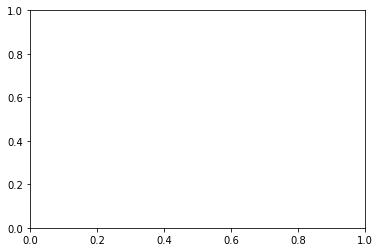

In [ ]:
plt.scatter(df["Year"], df_shooting, color ='sky blue',
        width = 0.4)
plt.xlabel("x-label")
plt.ylabel("y-label")
plt.title("graph title")
plt.show()